**Target:**

    -- In the previous step we had 9,970 parameters. In this step we want to
    improve this accuracy by using dropouts. We will use a dropout rate of 0.05 

**Results:**

    -- Parameters: 9,970
    -- Best Training Accuracy: 98.07
    -- Best Test Accuracy: 99.33


**Analysis:**

    -- There is a slight drop in test accuracy after introducing dropouts.
    -- In last few epochs, we can see that the training accuracy is increasing but the test accuracy is going up and down. This might be because of overfitting. 

#**Import libraries**

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

#**Data Transformations (without normalization)** 

In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      transforms.ToTensor()
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      transforms.ToTensor()
                                       ])


# **Dataset and Creating Train/Test Split (without normalization)**

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# **Dataloader Arguments & Test/Train Dataloaders (without normalization)**


In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#**Getting data statistics (without normalization)**
We will use the mean and standard deviation that we get from code below to normalize the data

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)
torch.Size([128, 1, 28, 28])
torch.Size([128])


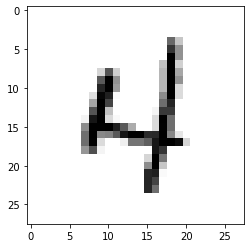

In [5]:
import numpy as np

train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

#**Data Transformations (with normalization)**

In [6]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,)) 
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,)) 
                                       ])


# **Dataset and Creating Train/Test Split (with normalization)**

In [7]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# **Dataloader Arguments & Test/Train Dataloaders (with normalization)**


In [8]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


#**Getting data statistics (with normalization)**
We will use the mean and standard deviation that we get from code below to normalize the data

[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


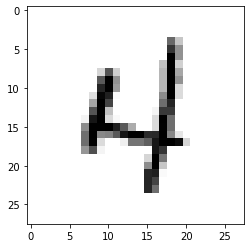

In [9]:
import numpy as np

train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

**Model**

In [46]:
dropout_value = 0.05
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    #input block
    self.convblock1 = nn.Sequential(nn.Conv2d(in_channels = 1, out_channels = 10, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(10),
                                    nn.ReLU(),
                                    nn.Dropout(dropout_value)) #R_in = 1, C_in = 28, K = 3, P = 1, S = 1, J_in = 1, J_out = 1, R_out = R_in + (K-1)*J_in =  1+ (3-1)*1 = 3, C_out = 28
    
    #conv block 1
    self.convblock2 = nn.Sequential(nn.Conv2d(in_channels = 10, out_channels = 12, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(12),
                                    nn.ReLU(),
                                    nn.Dropout(dropout_value)) #R_in = 3, C_in = 28, K = 3, P = 1, S = 1, J_in = 1, J_out = 1, R_out = R_in + (K-1)*J_in =  3+ (3-1)*1 = 5, , C_out = 28
    
    #conv block 2
    self.convblock3 = nn.Sequential(nn.Conv2d(in_channels = 12, out_channels = 14, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(14),
                                    nn.ReLU(),
                                    nn.Dropout(dropout_value)) #R_in = 5, C_in = 28, K = 3, P = 1, S = 1, J_in = 1, J_out = 1, R_out = R_in + (K-1)*J_in =  5+ (3-1)*1 = 7, , C_out = 28
    
    #transition block1
    self.convblock4 = nn.Sequential(nn.Conv2d(in_channels = 14, out_channels = 16, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(16),
                                    nn.ReLU(),
                                    nn.Dropout(dropout_value)) #R_in = 7, C_in = 28, K = 3, P = 1, S = 1, J_in = 1, J_out = 1, R_out = R_in + (K-1)*J_in =  7+ (3-1)*1 = 9, , C_out = 28

    self.pool1 = nn.MaxPool2d(2, 2) #R_in = 9, C_in = 28, K = 2, P = 0, S = 2, J_in = 1, J_out = 2, R_out = R_in + (K-1)*J_in =  9+ (2-1)*1 = 9, , C_out = 14

    #conv block 3
    self.convblock5 = nn.Sequential(nn.Conv2d(in_channels = 16, out_channels = 12, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(12),
                                    nn.ReLU(),
                                    nn.Dropout(dropout_value)) #R_in = 9, C_in = 14, K = 3, P = 1, S = 1, J_in = 2, J_out = 2, R_out = R_in + (K-1)*J_in =  9+ (3-1)*2 = 13, , C_out = 14
    
    #conv block 4
    self.convblock6 = nn.Sequential(nn.Conv2d(in_channels = 12, out_channels = 12, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(12),
                                    nn.ReLU(),
                                    nn.Dropout(dropout_value)) #R_in = 13, C_in = 14, K = 3, P = 1, S = 1, J_in = 2, J_out = 2, R_out = R_in + (K-1)*J_in =  13+ (3-1)*2 = 17, , C_out = 14

    #conv block 4
    self.convblock7 = nn.Sequential(nn.Conv2d(in_channels = 12, out_channels = 10, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(10),
                                    nn.ReLU(),
                                    nn.Dropout(dropout_value)) #R_in = 17, C_in = 14, K = 3, P = 1, S = 1, J_in = 2, J_out = 2, R_out = R_in + (K-1)*J_in =  17+ (3-1)*2 = 21, , C_out = 14
    #gap layer 
    self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=4))  #R_in = 21, C_in = 14, K = 4, P = 1, S = 1, J_in = 2, J_out = 2, R_out = R_in + (K-1)*J_in =  21+ (4-1)*2 = 27, , C_out = 14

    #output block
    self.convblock8 = nn.Sequential(nn.Conv2d(in_channels = 10, out_channels = 10, kernel_size = 3, padding = 0), nn.Dropout(dropout_value)) #R_in = 27, C_in = 14, K = 3, P = 0, S = 1, J_in = 2, J_out = 2, R_out = R_in + (K-1)*J_in =  27+ (3-1)*2 = 31, , C_out = 12

  def forward(self, x):
    x = self.convblock1(x)
    x = self.convblock2(x)
    x = self.convblock3(x)
    x = self.convblock4(x)
    x = self.pool1(x)
    x = self.convblock5(x)
    x = self.convblock6(x)
    x = self.convblock7(x)
    x = self.gap(x)
    x = self.convblock8(x)
    x = x.view(-1, 10)
    return F.log_softmax(x, dim=-1)

**Model parameters**

In [47]:
!pip install torchsummary
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = Net().to(device)
summary(model, input_size = (1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]             100
       BatchNorm2d-2           [-1, 10, 28, 28]              20
              ReLU-3           [-1, 10, 28, 28]               0
           Dropout-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 12, 28, 28]           1,092
       BatchNorm2d-6           [-1, 12, 28, 28]              24
              ReLU-7           [-1, 12, 28, 28]               0
           Dropout-8           [-1, 12, 28, 28]               0
            Conv2d-9           [-1, 14, 28, 28]           1,526
      BatchNorm2d-10           [-1, 14, 28, 28]              28
             ReLU-11           [-1, 14, 28, 28]               0
          Dropout-12           [-1, 14, 28, 28]               0
    

**Training and Testing**

In [48]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [49]:
from torch.optim.lr_scheduler import StepLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=6, gamma=0.1)


EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    # scheduler.step()
    test(model, device, test_loader)

EPOCH: 0


Loss=0.09847403317689896 Batch_id=468 Accuracy=88.59: 100%|██████████| 469/469 [00:19<00:00, 24.44it/s]



Test set: Average loss: 0.0915, Accuracy: 9720/10000 (97.20%)

EPOCH: 1


Loss=0.05309741571545601 Batch_id=468 Accuracy=96.39: 100%|██████████| 469/469 [00:20<00:00, 23.25it/s]



Test set: Average loss: 0.0486, Accuracy: 9851/10000 (98.51%)

EPOCH: 2


Loss=0.018912313506007195 Batch_id=468 Accuracy=97.04: 100%|██████████| 469/469 [00:15<00:00, 30.16it/s]



Test set: Average loss: 0.0480, Accuracy: 9848/10000 (98.48%)

EPOCH: 3


Loss=0.022453108802437782 Batch_id=468 Accuracy=97.13: 100%|██████████| 469/469 [00:16<00:00, 27.77it/s]



Test set: Average loss: 0.0407, Accuracy: 9872/10000 (98.72%)

EPOCH: 4


Loss=0.039117444306612015 Batch_id=468 Accuracy=97.51: 100%|██████████| 469/469 [00:15<00:00, 29.87it/s]



Test set: Average loss: 0.0399, Accuracy: 9872/10000 (98.72%)

EPOCH: 5


Loss=0.020529208704829216 Batch_id=468 Accuracy=97.68: 100%|██████████| 469/469 [00:15<00:00, 29.99it/s]



Test set: Average loss: 0.0324, Accuracy: 9900/10000 (99.00%)

EPOCH: 6


Loss=0.08593115955591202 Batch_id=468 Accuracy=97.67: 100%|██████████| 469/469 [00:16<00:00, 28.35it/s]



Test set: Average loss: 0.0297, Accuracy: 9912/10000 (99.12%)

EPOCH: 7


Loss=0.035492051392793655 Batch_id=468 Accuracy=97.70: 100%|██████████| 469/469 [00:15<00:00, 30.35it/s]



Test set: Average loss: 0.0370, Accuracy: 9878/10000 (98.78%)

EPOCH: 8


Loss=0.0680157020688057 Batch_id=468 Accuracy=97.77: 100%|██████████| 469/469 [00:15<00:00, 30.58it/s]



Test set: Average loss: 0.0235, Accuracy: 9927/10000 (99.27%)

EPOCH: 9


Loss=0.02738688886165619 Batch_id=468 Accuracy=97.84: 100%|██████████| 469/469 [00:15<00:00, 30.25it/s]



Test set: Average loss: 0.0246, Accuracy: 9925/10000 (99.25%)

EPOCH: 10


Loss=0.03704260662198067 Batch_id=468 Accuracy=97.94: 100%|██████████| 469/469 [00:15<00:00, 29.90it/s]



Test set: Average loss: 0.0246, Accuracy: 9918/10000 (99.18%)

EPOCH: 11


Loss=0.035303425043821335 Batch_id=468 Accuracy=97.97: 100%|██████████| 469/469 [00:16<00:00, 27.68it/s]



Test set: Average loss: 0.0235, Accuracy: 9933/10000 (99.33%)

EPOCH: 12


Loss=0.044491734355688095 Batch_id=468 Accuracy=98.00: 100%|██████████| 469/469 [00:15<00:00, 29.47it/s]



Test set: Average loss: 0.0235, Accuracy: 9920/10000 (99.20%)

EPOCH: 13


Loss=0.11517391353845596 Batch_id=468 Accuracy=98.07: 100%|██████████| 469/469 [00:15<00:00, 29.85it/s]



Test set: Average loss: 0.0270, Accuracy: 9918/10000 (99.18%)

EPOCH: 14


Loss=0.10927415639162064 Batch_id=468 Accuracy=98.02: 100%|██████████| 469/469 [00:15<00:00, 29.84it/s]



Test set: Average loss: 0.0281, Accuracy: 9917/10000 (99.17%)



Text(0.5, 1.0, 'Test Accuracy')

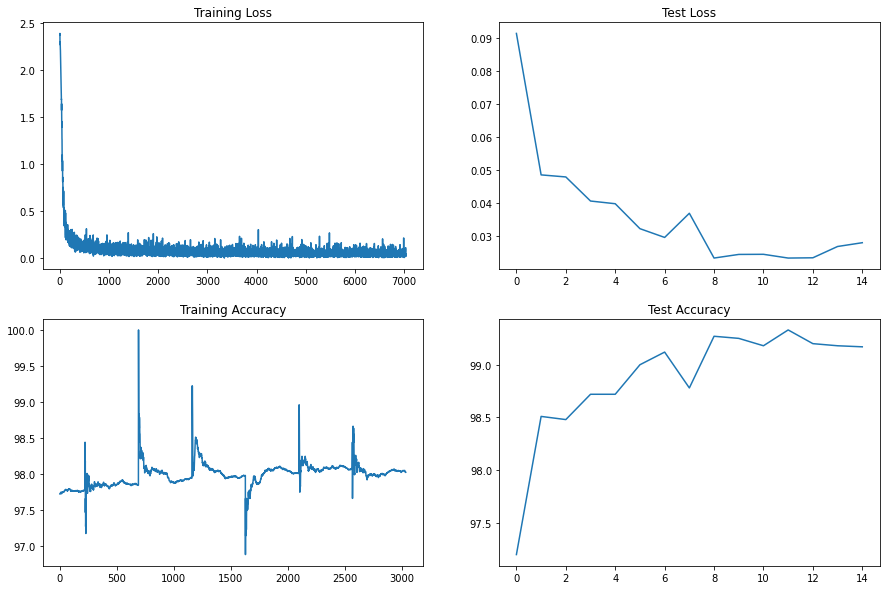

In [50]:
train_losses = [i.item() for i in train_losses]
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc[4000:])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")